In [1]:
#zomato is the indian food delivery company zomato user-reviews of restorent 
#for each neighborhood there are 6-7 category of restaurants viz.Buffet, Cafes, Delivery,
#Desserts, Dine-out, Drinks & nightlife, Pubs and bars.
#So, here we are trying to find the best restaurants for customer depends on their need."""

In [2]:
import pandas as pd 
import numpy as np
# library import


# Read the file 

In [3]:
zm = pd.read_csv(r"G:\regression\zomato.csv")
#

In [4]:
zm.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zm.shape
# shows the rows and columns 

(51717, 17)

# Minimize the dataset

In [6]:
zm = zm.loc[0:20000,::]
# we minimize the dataset here

In [7]:
zm.shape

(20001, 17)

# Drop and renaming the columns

In [8]:
zm = zm.drop(["url","address","phone","reviews_list","menu_item","dish_liked","location"],axis =1)

In [9]:
zm.rename(columns ={"approx_cost(for two people)":"approx_cost","name":"Restorents","cuisines":"food_type","listed_in(type)":"type","listed_in(city)":"city","rate":"rating",},inplace = True)

In [10]:
zm.head(2)

,Restorents,online_order,book_table,rating,votes,rest_type,food_type,approx_cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [11]:
zm.shape

(20001, 10)

# Data cleaning

In [12]:
zm = zm.dropna()

In [13]:
zm.isnull().sum()

Restorents      0
online_order    0
book_table      0
rating          0
votes           0
rest_type       0
food_type       0
approx_cost     0
type            0
city            0
dtype: int64

In [14]:
zm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17017 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Restorents    17017 non-null  object
 1   online_order  17017 non-null  object
 2   book_table    17017 non-null  object
 3   rating        17017 non-null  object
 4   votes         17017 non-null  int64 
 5   rest_type     17017 non-null  object
 6   food_type     17017 non-null  object
 7   approx_cost   17017 non-null  object
 8   type          17017 non-null  object
 9   city          17017 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [15]:
# finding out the dublicate rows 
# helps to find the dame repeated rows :
# then removind the duplicate rows for understanding the data 

# Removing duplicates

In [16]:
zm[zm.duplicated()].count().sum()

540

In [17]:
zm.drop_duplicates(inplace = True)

In [18]:
zm.shape

(16963, 10)

# working on individual columns

In [19]:
zm.rating.unique()
# on rating columns 

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5'], dtype=object)

In [20]:
def rate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=value.split('/')
        value=value[0]
        return float(value)
    
zm['rating']=zm['rating'].apply(rate)
zm['rating'].head()
# rate columns 

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [21]:
zm['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000'], dtype=object)

In [22]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

zm['approx_cost']=zm['approx_cost'].apply(money)


In [23]:
zm.groupby("Restorents").count().head()

,online_order,book_table,rating,votes,rest_type,food_type,approx_cost,type,city
Restorents,,,,,,,,,
#FeelTheROLL,1,1,1,1,1,1,1,1,1
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,1,1,1,1,1,1,1,1,1


In [24]:
zm['Restorents']=zm['Restorents'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

# Data visualzation

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

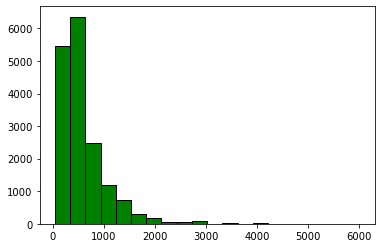

In [69]:
plt.hist(zm['approx_cost'], color ='g',bins =20 , edgecolor ='k', label= str  );
# approximated cost for 2 peoples 

In [70]:
# the histogram shows that approx cost for two peoples 
# most of the peoples goes for 0 to 1000 rs cost 

In [26]:
# boxplot and normal distribution is basically used to show the outlier.

,rest_type
Quick Bites,5810
Casual Dining,3924
Cafe,1363
Dessert Parlor,757
Delivery,674
"Takeaway, Delivery",570
"Casual Dining, Bar",451
Bakery,334
Beverage Shop,263
Bar,228


Text(0.5, 1.0, 'Restaurant types')

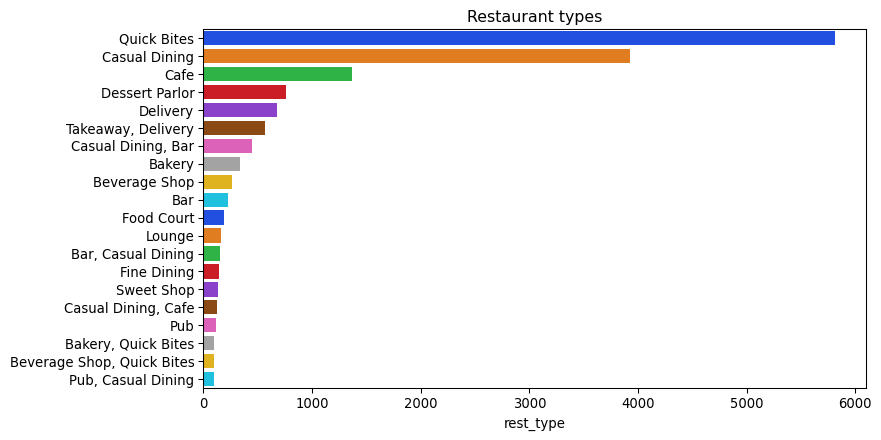

In [27]:
type1=zm['rest_type'].value_counts().head(20)
display(type1.to_frame())
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(x=type1,y= type1.index ,palette='bright')
plt.title('Restaurant types')
# Restorent type data shows quick bites 5810 and many others

In [28]:
# in this graph shows that the types of restorrants in banglore and among all of them
# IN bangloruru 5810 are the Quick bites type of restorents which is highest 
# following of casual dinning with 3924 restorents.
# pub and casual dinning are most lowest  with 94 restorents.


Text(0.5, 1.0, 'Online delivery')

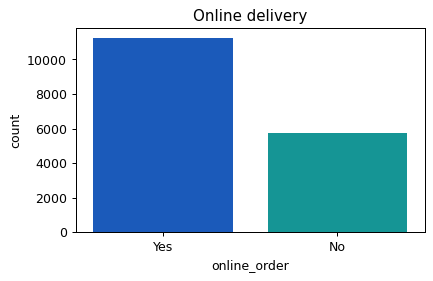

In [29]:
plt.figure(figsize=(5,3), dpi=90)
sns.countplot(x='online_order',data=zm , palette='winter')
plt.title('Online delivery')


In [30]:
# this graph shows restorunt delivering online or not 

In [31]:
# here we are noted that more than 15000 restorunt delivering online and 
# 6000 restorunt not delivering online food 

In [32]:
import seaborn as sns

<AxesSubplot:title={'center':'Online order vs rating'}, xlabel='online_order', ylabel='rating'>

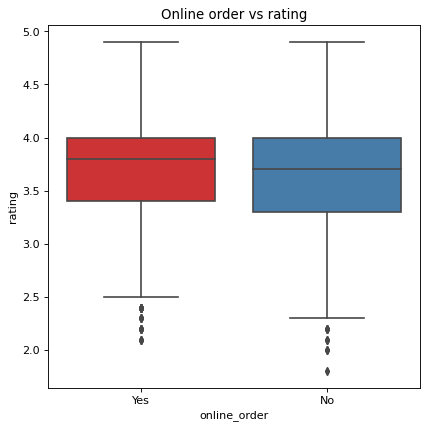

In [33]:
plt.figure(figsize=(6,6),dpi=80)
plt.title('Online order vs rating')
sns.boxplot(x='online_order',y='rating',data=zm,palette='Set1')

In [34]:
# avaerage rating of rhe online order is higest
# restorent which have the online order is higest rating then the 
# then restorent have a offline order 

<AxesSubplot:title={'center':'book_table vs rating'}, xlabel='book_table', ylabel='rating'>

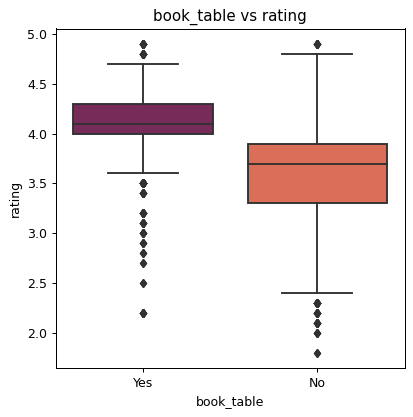

In [35]:
plt.figure(figsize=(5,5),dpi=90)
plt.title('book_table vs rating')
sns.boxplot(x='book_table',y='rating',data=zm,palette='rocket')


In [36]:
# the restorent which accept the booking have the highest ratting,
# then the restorent accept the booking 

In [37]:
# cost of the restorent 

C:\Users\karti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


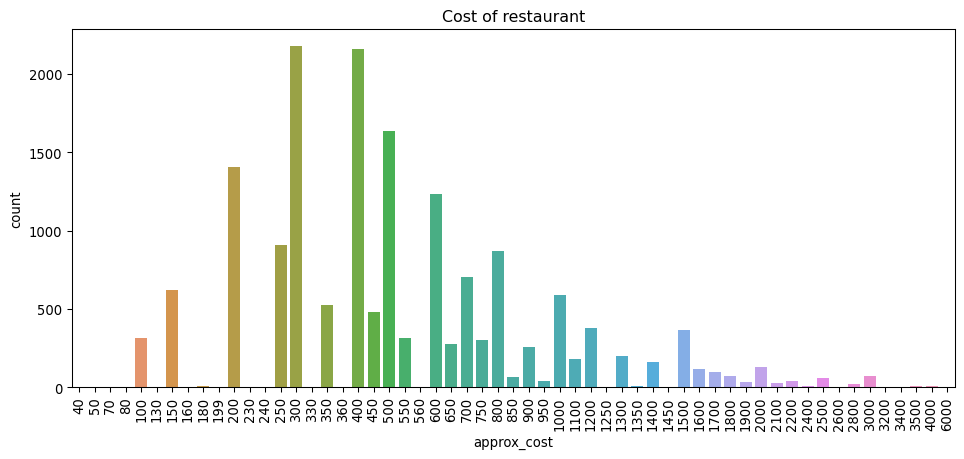

In [38]:
plt.figure(figsize=(12,5),dpi=95)
sns.countplot(zm['approx_cost'])
plt.xticks(rotation=90)
plt.title('Cost of restaurant')
plt.show()

In [39]:
# the cost between 200 to 500 have the maximum booking and 
#the range is  between 100 to 3000

In [40]:
# Famous restorent chain in banglore 

,votes
Restorents,
Byg Brewski Brewing Company,16345.000000
Toit,14956.000000
Big Pitcher,9036.000000
The Black Pearl,8719.500000
Arbor Brewing Company,8379.200000
Church Street Social,7545.600000
Hoot,7198.600000
Vapour Pub & Brewery,6907.000000
TBC Sky Lounge,6745.000000


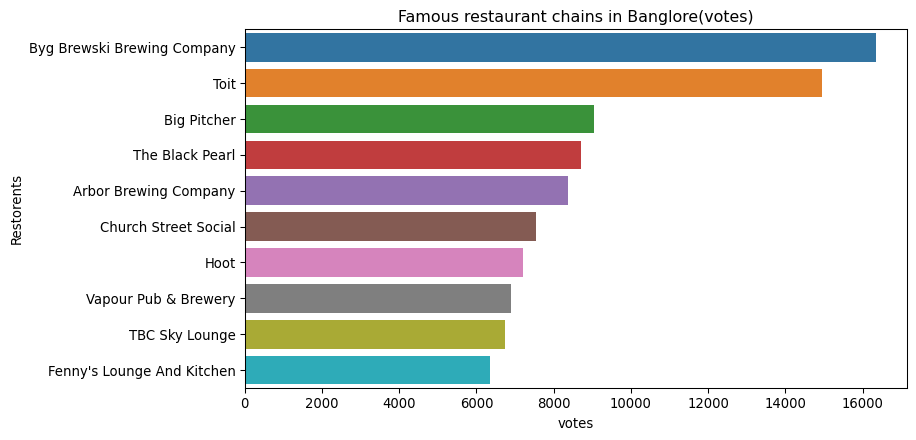

In [41]:
vote=zm.groupby('Restorents')['votes'].agg('mean').sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=vote.index,x=vote,orient='h')
plt.title('Famous restaurant chains in Banglore(votes)')
display(vote.to_frame())
plt.show()

In [42]:
# graph shows the famous restorent in banglore with respect to votes

# the (Byg Brewski Brewing Company) the most famous restorent chain with more than 
# 16000 votes
# (fenny's Lounge And Kitchen) is the lowest one with 6000+ votes 


,Restorents
Cafe Coffee Day,39
Onesta,33
Five Star Chicken,31
Empire Restaurant,30
Just Bake,29
Petoo,28
Kanti Sweets,27
Baskin Robbins,26
Sweet Truth,26
Faasos,25


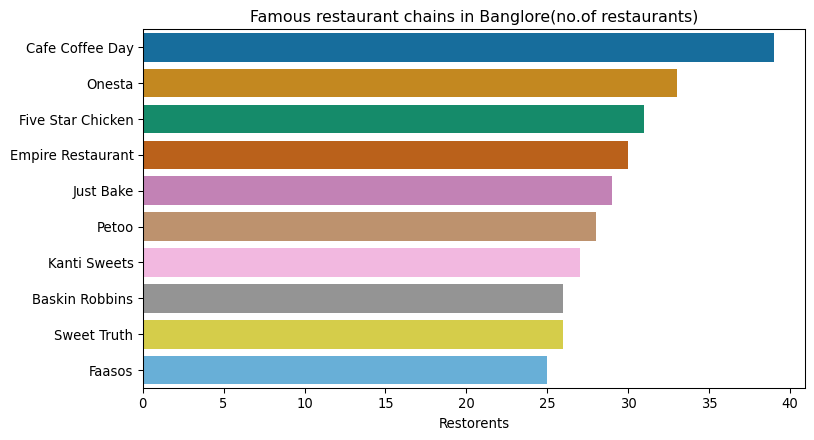

In [43]:
#Most famous restaurant chains in Bengaluru(no of restaurants)
hotels=zm['Restorents'].value_counts().head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=hotels.index,x=hotels,orient='h',palette='colorblind')
plt.title('Famous restaurant chains in Banglore(no.of restaurants)')
display(hotels.to_frame())
plt.show()

In [44]:
# the graph shows that famous restorent in banglore with respect to shops(outlests)
# (cafe Coffee Day) is at the top with 39 shops 
# faasos is at the lowest with 24 shops 

,rating
Restorents,
Punjab Grill,4.900000
Flechazo,4.900000
Byg Brewski Brewing Company,4.900000
Asia Kitchen By Mainland China,4.900000
Belgian Waffle Factory,4.870000
AB's - Absolute Barbecues,4.814286
The Pizza Bakery,4.800000
Brahmin's Coffee Bar,4.800000
House Of Commons,4.757143


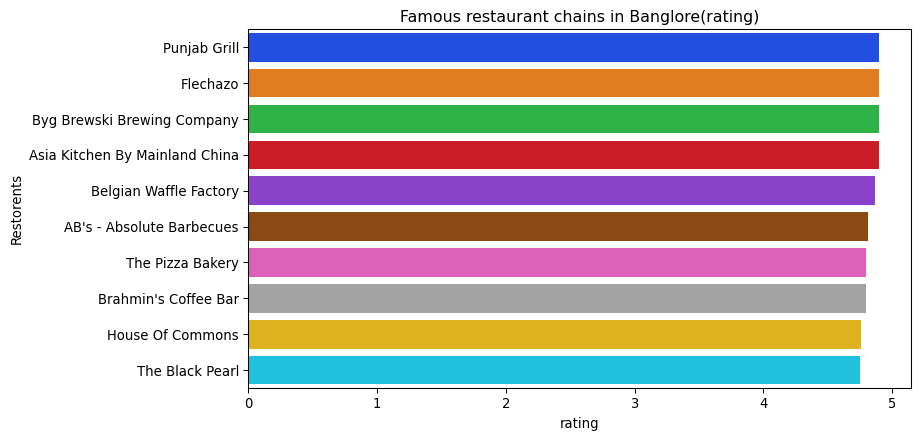

In [45]:
#Most famous restaurant chains in Bengaluru(rating)
rate=zm.groupby('Restorents')['rating'].agg('mean').sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=rate.index,x=rate,orient='h',palette='bright')
plt.title('Famous restaurant chains in Banglore(rating)')
display(rate.to_frame())
plt.show()

In [46]:
# the graph shows the famous restarant chains in banglore with respect to ratings
# punjab Gril is at a top with 4.9 % of voting 
# and the black pearl is at the lowest with 4.75% of voting 
# every restorent chain componies voting is more the 4.5% .
# the top three restorents are 
# punjab grills 
# Flechazo
# Byg Brewski Brewing Company

In [47]:
# thanks you